# Shortest Distance to Target Color

You are given an array `colors`, in which there are three colors: `1`, `2` and `3`.

Example 1:You are also given some queries. Each query consists of two integers `i` and `c`, return the shortest distance between the given index `i` and the target color `c`. If there is no solution return `-1`.

Example 1:

```
Input: colors = [1,1,2,1,3,2,2,3,3], queries = [[1,3],[2,2],[6,1]]
Output: [3,0,3]
Explanation: 
The nearest 3 from index 1 is at index 4 (3 steps away).
The nearest 2 from index 2 is at index 2 itself (0 steps away).
The nearest 1 from index 6 is at index 3 (3 steps away)
```

Example 2:

```
Input: colors = [1,2], queries = [[0,3]]
Output: [-1]
Explanation: There is no 3 in the array.
```


Constraints:

```
1 <= colors.length <= 5*10^4
1 <= colors[i] <= 3
1 <= queries.length <= 5*10^4
queries[i].length == 2
0 <= queries[i][0] < colors.length
1 <= queries[i][1] <= 3
```

In [1]:
from typing import *

class Solution:
    # time = O(n + q)
    # space = O(n)
    # n = len(colors)
    # q = len(queries)
    def shortestDistanceColor(self, colors: List[int], queries: List[List[int]]) -> List[int]:
        # initializations
        n = len(colors)
        rightmost = [0, 0, 0]
        leftmost = [n - 1, n - 1, n - 1]

        distance = [[-1] * n for _ in range(3)]

        # looking forward
        for i in range(n):
            color = colors[i] - 1
            for j in range(rightmost[color], i + 1):
                distance[color][j] = i - j
            rightmost[color] = i + 1

        # looking backward
        for i in range(n - 1, -1, -1):
            color = colors[i] - 1
            for j in range(leftmost[color], i - 1, -1):
                # if the we did not find a target color on its right
                # or we find out that a target color on its left is
                # closer to the one on its right
                if distance[color][j] == -1 or distance[color][j] > j - i:
                    distance[color][j] = j - i
            leftmost[color] = i - 1

        return [distance[color - 1][index] for index,color in queries]

In [2]:
colors = [1,1,2,1,3,2,2,3,3]
queries = [[1,3],[2,2],[6,1]]
expected = [3,0,3]

output = Solution().shortestDistanceColor(colors, queries)
print(output)

assert output == expected

[3, 0, 3]


In [3]:
colors = [1,2]
queries = [[0,3]]
expected = [-1]

output = Solution().shortestDistanceColor(colors, queries)
print(output)

assert output == expected

[-1]


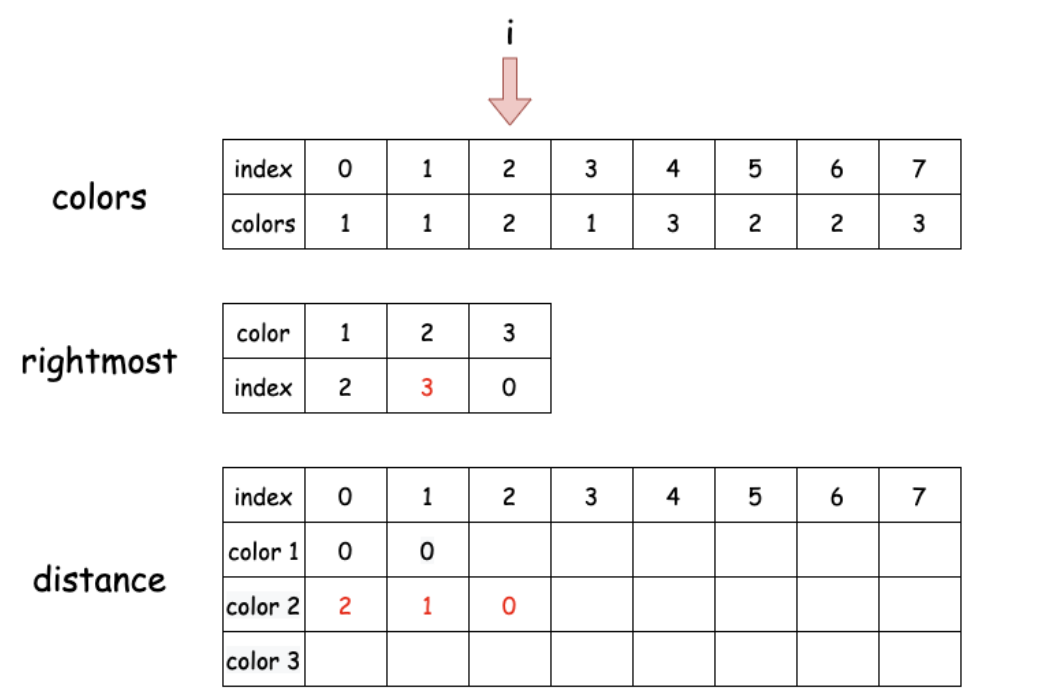